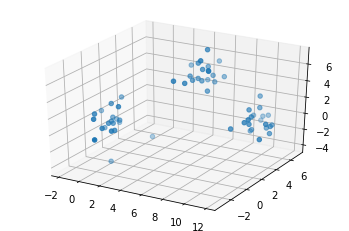

In [1]:
import numpy as np
import matplotlib.pyplot as plt

points = [np.random.randn(3) for _ in range(20)]
points.extend([np.random.randn(3) + np.array([5, 5, 5]) for _ in range(20)])
points.extend([np.random.randn(3) + np.array([10, 5, 0]) for _ in range(20)])
points = np.array(points)

fig = plt.figure()
ax = fig.gca(projection='3d')

X = points[:, 0]
Y = points[:, 1]
Z = points[:, 2]

ax.scatter(X, Y, Z)
plt.show()

[1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2
 2 2 2 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]
[[10.36747465  4.67110455  0.07871456]
 [ 0.16126161 -0.18061656  0.16547148]
 [ 5.02980306  4.82077313  4.65492938]]


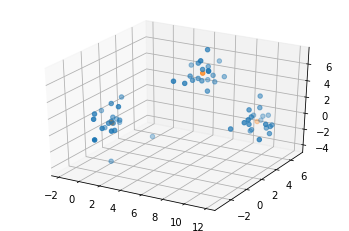

In [2]:
from sklearn.cluster import KMeans

kmeans = KMeans(n_clusters=3)
kmeans.fit(points)

print(kmeans.labels_)
print(kmeans.cluster_centers_)

centroids = kmeans.cluster_centers_

fig = plt.figure()
ax = fig.gca(projection='3d')

ax.scatter(points[:, 0], points[:, 1], points[:, 2])
ax.scatter(centroids[:, 0], centroids[:, 1], centroids[:, 2])

plt.show()

In [3]:
def kmeans(points, k, max_iters=10):
  """
    return labels, cluster_centers

    1. cluster centers를 랜덤하게 생성한다.
    2. 각각의 점마다 어떤 cluster center와 가장 가까운지 계산 및 할당 (a.k.a. labels 계산)
    3. 새로운 labels을 이용해서, cluster center 새로 계산
    4. 2-3 반복하다가... 더이상 업데이트가 없으면 종료
  """

  # 1. cluster centers를 랜덤하게 생성한다 fogy: 있는 점 중에서 랜덤하게 k개를 골라서 초기 cluster center로 설정
  cluster_centers = points[np.random.choice(n_points, k, replace=False)]

  for iter in range(max_iters):

    # 2. 각각의 점마다 어떤 cluster center와 가장 가까운지 계산 및 할당 (a.k.a. labels 계산)
    labels = []
    for p in points:
      min_dist = np.inf
      min_cid = -1
      for cid, c in enumerate(cluster_centers):
        dist = euclidean_distance(p, c)
        if dist < min_dist:
          min_dist = dist
          min_cid = cid
    
      labels.append(min_cid)
    labels = np.array(labels)

    # 3. 새로운 labels을 이용해서, cluster_center 새로 계산
    new_cluster_centers = np.zeros_like(cluster_centers)
    counts = np.zeros(k)

    for l, p in zip(labels, points):
      new_cluster_centers[l] += p
      counts[l] += 1

    for i in range(k):
      new_cluster_centers[i] /= counts[i]
  
    if np.array_equal(cluster_centers, new_cluster_centers):
      break
    else:
      cluster_centers = new_cluster_centers
    
    print("iteration #", iter)
  
  return labels, cluster_centers


In [4]:
k=3
max_iters=10
n_points = points.shape[0]

def euclidean_distance(a, b):
  return ((a - b) ** 2).sum() ** 0.5
  
# 같은 클러스터에 속한 점들 (aka. 같은 cluster_center와 가장 가까운 점들)을 평균내고싶다!


iteration # 0


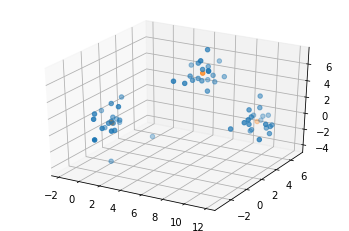

In [5]:
labels, cluster_centers = kmeans(points, 3)

fig = plt.figure()
ax = fig.gca(projection='3d')

ax.scatter(points[:, 0], points[:,1], points[:, 2])
ax.scatter(cluster_centers[:, 0], cluster_centers[:, 1], cluster_centers[:, 2])

plt.show()

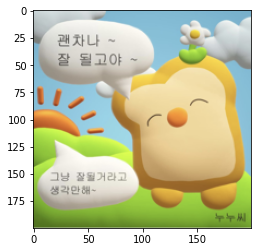

In [6]:
from PIL import Image

img = Image.open("KakaoTalk_20210804_003852884.jpg")

width = 200
height = 200
img = img.resize((width, height))

plt.imshow(img)
plt.show()

In [8]:
pixels = np.array(img).reshape(40000, 3).astype(np.float32)

labels, cluster_centers = kmeans(pixels, 10)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:39: RuntimeWarning: invalid value encountered in true_divide


iteration # 0
iteration # 1
iteration # 2
iteration # 3
iteration # 4
iteration # 5
iteration # 6
iteration # 7
iteration # 8
iteration # 9


In [10]:
for l, i in zip(labels, range(pixels.shape[0])):
  pixels[i] = cluster_centers[l]

pixels = pixels.astype(np.uint8)

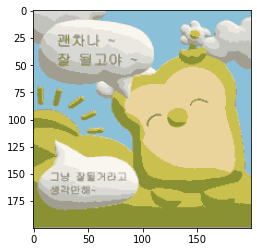

In [13]:
im_remastered = Image.fromarray(pixels.reshape((height, width, 3)), 'RGB')
plt.imshow(im_remastered)
plt.show()